# Attempt to apply Grover's algorithm to a "rail yard shunting" problem

I understand that Grover's algorithm relies on amplitude amplification which I think is a result of quantum interference - thus I think this is suitable for the IBM creative QHack 2021 challenge - although I am just starting with qc so could be wrong!

My attempt is to model the combinatorial shunting problem as a SAT and use Grover's algorithm to identify a feasible solution.  Previously my solutions involved Dynamic Programming and Reinforcement Learning successful in solving small 3x3 problems - so I was interested to see how QC could be applied.

In "our" version of shunting problem the objective is to move select cars from one track to another in sorted order in less than a certain number of steps (time).

In this formulation we consider each track to be a stack of a certain length.  Each spot on the track  is 1 if occupied by a car and 0 otherwise.   Cars must be popped of the stack and pushed onto another.  A "shunt" is considered a single pop/push operation of one or more cars.  At the end of a specifed number of periods the designated cars must be in sorted order on the destination track.  Not all tracks are directly connected and shunts may need to use intermedidate tracks to get to the destination.

For example consider a 3 track 3 car shunting problem:
Track 1: 'CBA'
Track 2: '== '
Track 3: '==='

Where letters represent rail cars and = emtpy track spots.  Note that track 1 is connected to 2, and 2 to 3.

The objective is to arrive at the following configuration:
Track 1: '==='
Track 2: '== '
Track 3: 'ABC'

We first start with the simplest case of 1 car, 2 tracks and a trivial problem of moving the single car to the other track in 1 time period:
Track 1: 'A'
Track 2: '='

In [ ]:
import numpy as np
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

We model the problem as 4-SAT problem where each variable represents the car being at given spot at a specific time.  Therefore  (1,0) is the starting position and (0, 1) is the desired position at the end of the time period. 

In [7]:
input_4sat_instance = '''
c qshunt DIMACS-CNF 4-SAT
p cnf 4 1
1 -2 -3 4 0
'''

In [8]:
oracle = LogicalExpressionOracle(input_4sat_instance)
grover = Grover(oracle)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result.assignment)

[-1, 2, 3, -4]


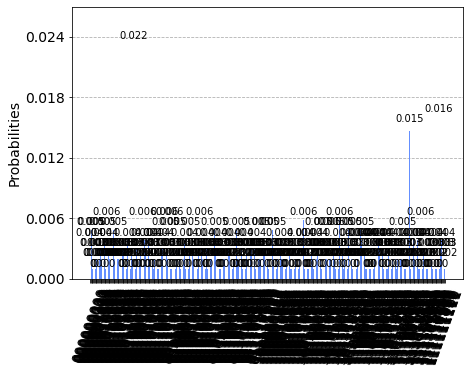

In [12]:
plot_histogram(result['measurement'])

Note that our variable space is 2 tracks x 2 time periods.  Let's increase the size to 3 tracks x 3 spots x 3 time periods ignoring the need to sort cars at this time.

In [15]:
input_9sat_instance = '''
c qshunt DIMACS-CNF 27-SAT
p cnf 27 3
1 2 3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 0
-1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 13 14 15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 0
-1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 25 26 27 0
'''

Unfortunately a 3x3 problem increased the size of the SAT problem to 27!  Furthermore notice how writing out the constraints actually requires to determine a feasible solution!

Caution: below will run of memory in notebook!

In [ ]:
oracle = LogicalExpressionOracle(input_9sat_instance)
grover = Grover(oracle)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result.assignment)

In [ ]:
plot_histogram(result['measurement'])

Unfortunately running a problem of this size was not possible in the Quantum Lab notebook without running out of memory.

It was a good learning opportunity! But I will now focus on a different formulation (modified problem?) to reduce the variable space for the SAT problem and how to generalize the constraints (e.g. we have a fixed number of cars in all time periods and cars move in blocks).

Furthermore we ignored identifying the actual cars which is required for sorting.

I am impressed with qiskit, IBM's QC capability, and ease of integration with traditional optimization algorithms!  Looking forward to learning more.

Bart Maciszewski